# Simple Widget Introduction
Based on:
https://github.com/ipython/ipywidgets/blob/master/docs/source/examples/Widget%20Events.ipynb

## What are widgets?

Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

## What can they be used for?

You can use widgets to build **interactive GUIs** for your notebooks.  
You can also use widgets to **synchronize stateful and stateless information** between Python and JavaScript.

## Activating widgets in SWAN
Before using widgets, we need to enable the corresponding notebook extension. After running the following cell, please refresh your notebook page!

In [1]:
!jupyter nbextension enable --py widgetsnbextension

Unrecognized JSON config file version, assuming version 1
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Using widgets  

To use the widget framework, you need to import `ipywidgets`.

In [2]:
from ipywidgets import *

### repr

Widgets have their own display `repr` which allows them to be displayed using IPython's display framework.  Constructing and returning an `IntSlider` automatically displays the widget (as seen below).  Widgets are displayed inside the widget area, which sits between the code cell and output.  You can hide all of the widgets in the widget area by clicking the grey *x* in the margin.

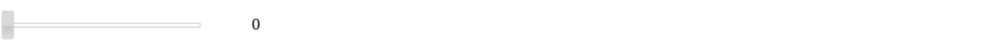

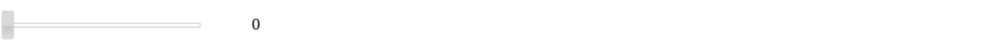

In [3]:
IntSlider()

### display()

You can also explicitly display the widget using `display(...)`.

In [4]:
from IPython.display import display
w = IntSlider()
display(w)

### Multiple display() calls

If you display the same widget twice, the displayed instances in the front-end will remain in sync with each other.  Try dragging the slider below and watch the slider above.

In [5]:
display(w)

## Why does displaying the same widget twice work?

Widgets are represented in the back-end by a single object.  Each time a widget is displayed, a new representation of that same object is created in the front-end.  These representations are called views.

![Kernel & front-end diagram](images/WidgetModelView.png)

### Closing widgets

You can close a widget by calling its `close()` method.

In [6]:
display(w)

In [7]:
w.close()

## Widget properties

All of the IPython widgets share a similar naming scheme.  To read the value of a widget, you can query its `value` property.

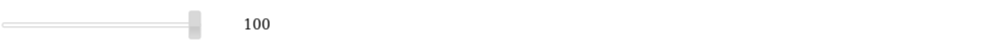

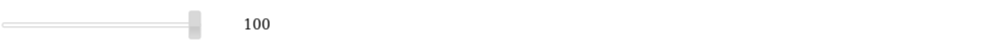

In [8]:
w = IntSlider()
display(w)

In [9]:
w.value

0

Similarly, to set a widget's value, you can set its `value` property.

In [10]:
w.value = 100

### Keys

In addition to `value`, most widgets share `keys`, `description`, `disabled`, and `visible`.  To see the entire list of synchronized, stateful properties of any specific widget, you can query the `keys` property.

In [11]:
w.keys

['_view_name',
 'orientation',
 'color',
 '_view_module',
 'disabled',
 'visible',
 'readout_format',
 '_model_module',
 'font_style',
 'layout',
 'min',
 '_range',
 'background_color',
 'slider_color',
 'continuous_update',
 'font_family',
 '_dom_classes',
 'description',
 '_model_name',
 'max',
 'readout',
 'font_weight',
 'step',
 'font_size',
 'msg_throttle',
 'value']

### Shorthand for setting the initial values of widget properties

While creating a widget, you can set some or all of the initial values of that widget by defining them as keyword arguments in the widget's constructor (as seen below).

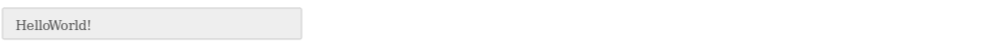

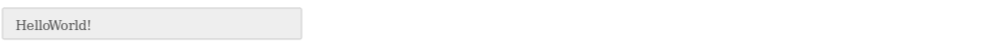

In [12]:
Text(value='Hello World!', disabled=True)

## Linking two similar widgets

If you need to display the same value two different ways, you'll have to use two different widgets.  Instead of attempting to manually synchronize the values of the two widgets, you can use the `traitlet` `link` function to link two properties together.  Below, the values of two widgets are linked together.

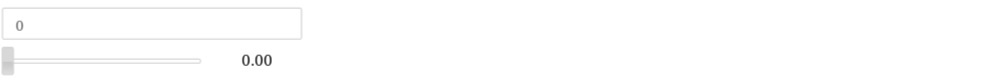

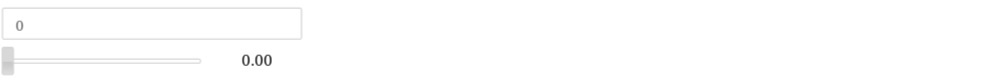

In [13]:
from traitlets import link
a = FloatText()
b = FloatSlider()
display(a,b)

mylink = link((a, 'value'), (b, 'value'))

### Unlinking widgets

Unlinking the widgets is simple.  All you have to do is call `.unlink` on the link object.  Try changing one of the widgets above after unlinking to see that they can be independently changed.

In [14]:
mylink.unlink()